In [1]:
#Importing general Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Importing Algorithms packages

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import probplot

In [3]:
#loading the dataset
df=pd.read_excel('DS - Assignment Part 1 data set.xlsx')

In [4]:
#Display Ist 5 rows of the dataset
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [5]:
#shape and structure of the dataset
df.shape

(414, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [7]:
#To check whether any null values present
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [8]:
#To check whether any duplicate value present in our dataset
df.duplicated().sum()

0

In [9]:
#
df.rename({'Distance from nearest Metro station (km)': 'Nearest Metro station(km)','House size (sqft)': 'Area(sqft)', 'House price of unit area': 'Price', 'House Age': 'Age' },axis=1,inplace=True)

In [10]:
df.head()

,Transaction date,Age,Nearest Metro station(km),Number of convenience stores,latitude,longitude,Number of bedrooms,Area(sqft),Price
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [11]:
#Describe the parameters
df.describe()

,Transaction date,Age,Nearest Metro station(km),Number of convenience stores,latitude,longitude,Number of bedrooms,Area(sqft),Price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


<AxesSubplot:xlabel='Price', ylabel='Density'>

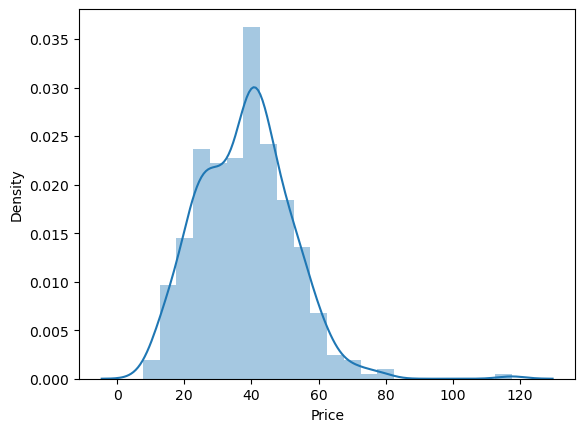

In [12]:
#Distribution of target Column
sns.distplot(df['Price'])

Skewness of Age: 0.38292623077299737
Kurtosis of Age: -0.8771201112290763


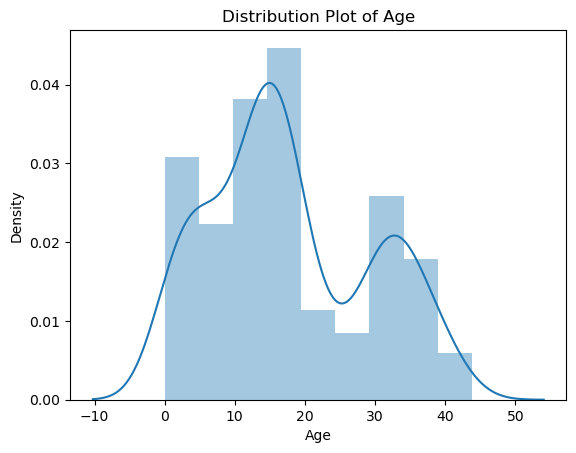

Skewness of Nearest Metro station(km): 1.8887565801256048
Kurtosis of Nearest Metro station(km): 3.20786836751181


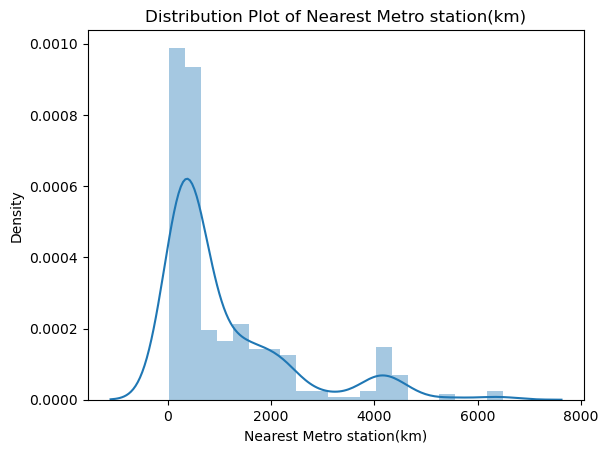

Skewness of Number of convenience stores: 0.15460656758377123
Kurtosis of Number of convenience stores: -1.0657514990134194


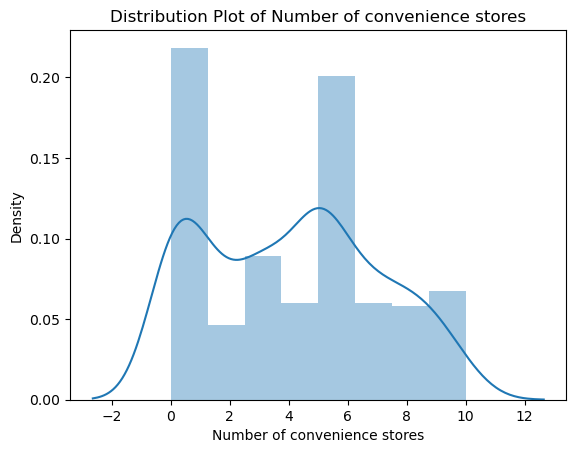

Skewness of latitude: -0.4385984450390504
Kurtosis of latitude: 0.26906977798608933


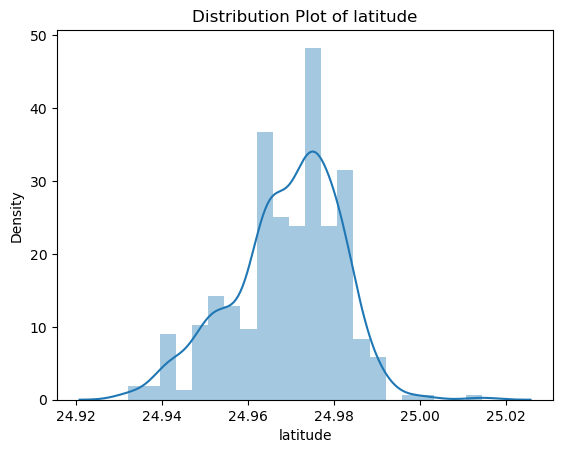

Skewness of longitude: -1.2195914979891498
Kurtosis of longitude: 1.2017924639738427


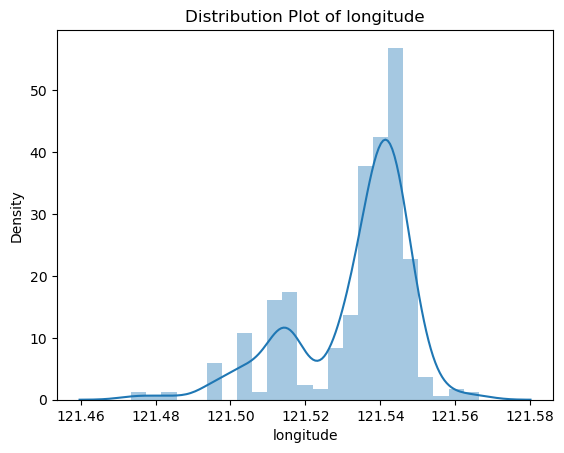

Skewness of Number of bedrooms: 0.022309017612164857
Kurtosis of Number of bedrooms: -1.5084574767476928


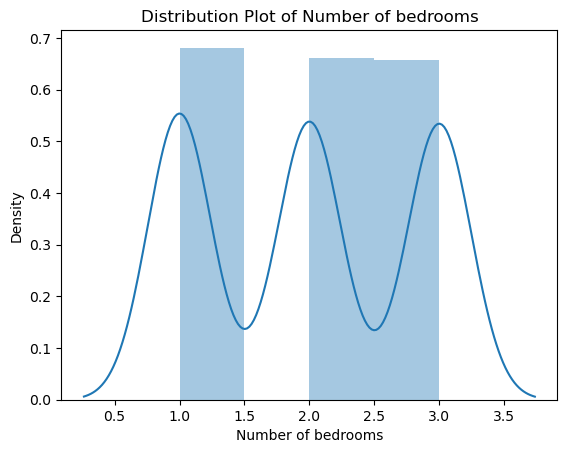

Skewness of Area(sqft): -0.11362728091036625
Kurtosis of Area(sqft): -1.4220194906438015


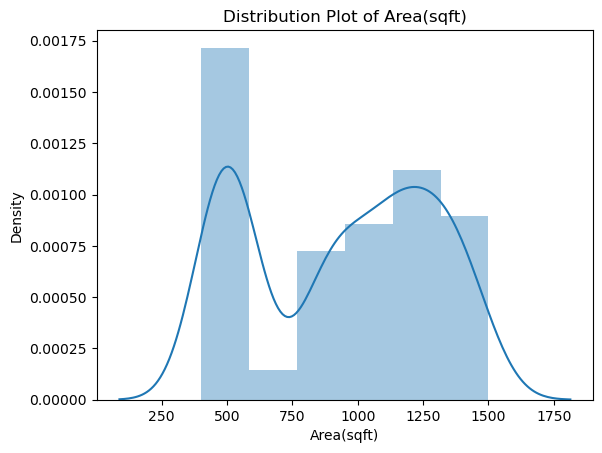

Skewness of Price: 0.5998525842660576
Kurtosis of Price: 2.1790970477396163


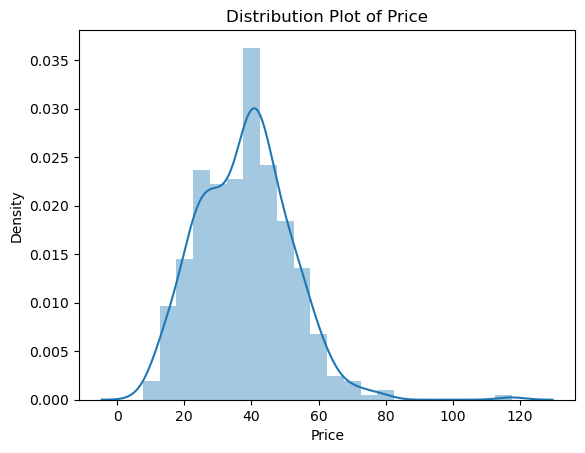

In [13]:
#Distribution Plot & their Skewness and kurtosis
for col in df.columns:
    if col != 'Transaction date':
        print(f"Skewness of {col}:",df[col].skew())
        print(f"Kurtosis of {col}:",df[col].kurtosis())
        sns.distplot(df[col])
        plt.title(f'Distribution Plot of {col}')
        plt.show()
        

In [14]:
#Correlation of parameters with price
df.corr()['Price'].sort_values(ascending=False)[1:]

Number of convenience stores    0.571005
latitude                        0.546307
longitude                       0.523287
Transaction date                0.087529
Number of bedrooms              0.050265
Area(sqft)                      0.046489
Age                            -0.210567
Nearest Metro station(km)      -0.673613
Name: Price, dtype: float64

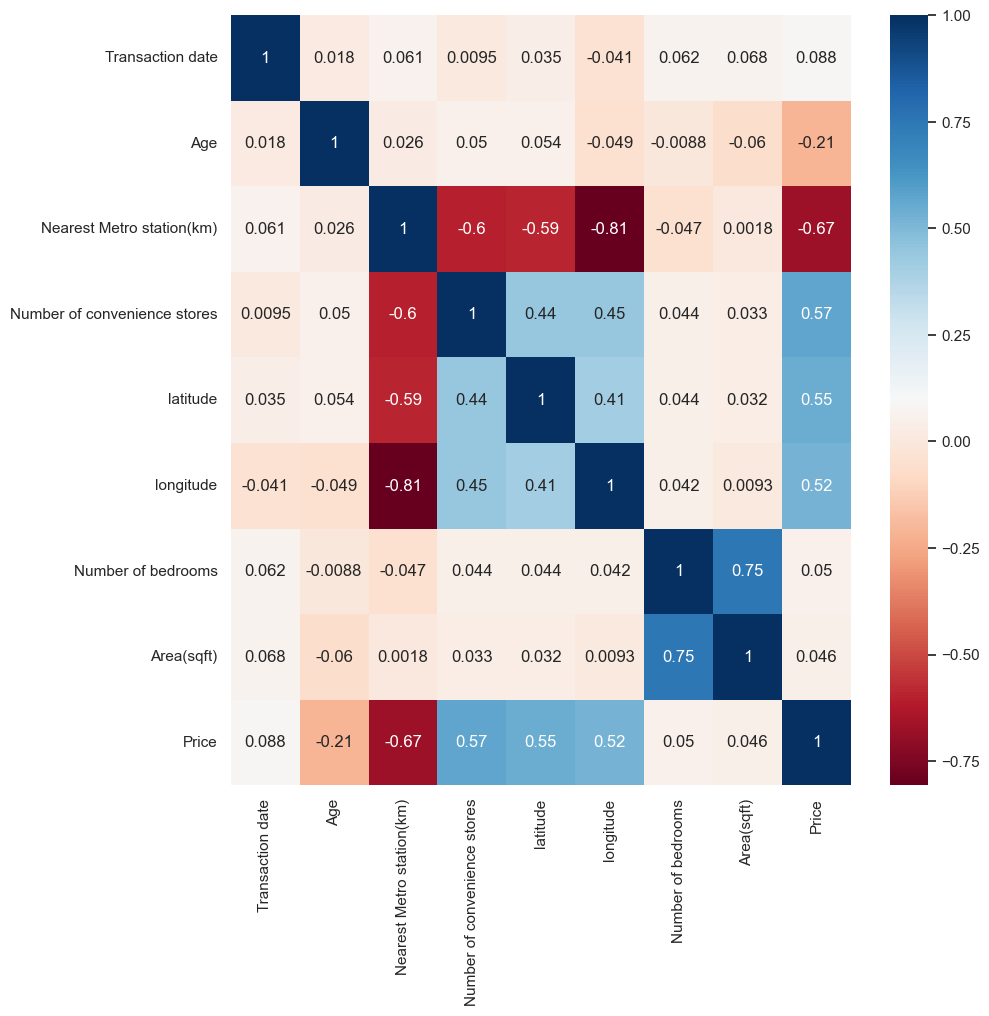

In [15]:
#Data Visualization & correlation using Heatmap
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(df.corr(), annot=True,cmap='RdBu')
plt.show()

In [16]:
#Making a copy of the data
df_copy = df.copy()
df_copy.head()

,Transaction date,Age,Nearest Metro station(km),Number of convenience stores,latitude,longitude,Number of bedrooms,Area(sqft),Price
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [17]:
#Feature Scaling
scaler = StandardScaler()
features = df_copy.columns
df_copy = scaler.fit_transform(df_copy)
df_copy = pd.DataFrame(df_copy,columns=features)
df_copy.head()

,Transaction date,Age,Nearest Metro station(km),Number of convenience stores,latitude,longitude,Number of bedrooms,Area(sqft),Price
0,-0.824722,1.255628,-0.792495,2.007407,1.125430,0.448762,-1.207899,-1.022920,-0.005901
1,-0.824722,0.157086,-0.616612,1.667503,0.912444,0.401139,0.014766,0.885321,0.310507
2,1.542244,-0.387791,-0.414015,0.307885,1.486860,0.688183,1.237432,0.368804,0.685782
3,1.246373,-0.387791,-0.414015,0.307885,1.486860,0.688183,0.014766,-0.162059,1.237656
4,-1.120593,-1.117223,-0.549997,0.307885,0.834188,0.592937,-1.207899,-1.263960,0.376732


In [18]:
#Splitting X and Y 
X = df.drop('Price',axis=1)
y = df.Price

In [19]:
#Splitting Testing and Training testsets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101,shuffle=True)

In [20]:
models = []
scores = []

In [21]:
#Model Training with their respective RMSE & R2 score.
def fit_and_test_model(model):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
    print("R2 Score:",r2_score(y_test,pred))
    models.append(str(model).split('(')[0])
    scores.append(r2_score(y_test,pred))

In [22]:
#Linear Regression
fit_and_test_model(LinearRegression())

RMSE: 6.866134533815876
R2 Score: 0.6438652713414581


In [23]:
#KNN
fit_and_test_model(KNeighborsRegressor())

RMSE: 7.784480149631059
R2 Score: 0.5422283006670428


In [24]:
#SVM
fit_and_test_model(SVR())

RMSE: 7.341659162224277
R2 Score: 0.5928277745006583


In [25]:
#DecisionTree
fit_and_test_model(DecisionTreeRegressor())

RMSE: 7.775325073590172
R2 Score: 0.5433044085701197


In [26]:
#Random Forest
fit_and_test_model(RandomForestRegressor())

RMSE: 5.6912305495384725
R2 Score: 0.7553179744868345


In [27]:
#Evaluating Model Performances
model_performances = pd.DataFrame([models,scores]).T
model_performances.columns = ['Model','R2 Score']
model_performances.set_index('Model',inplace=True)
model_performances = model_performances.sort_values('R2 Score',ascending=False)
model_performances

,R2 Score
Model,
RandomForestRegressor,0.755318
LinearRegression,0.643865
SVR,0.592828
DecisionTreeRegressor,0.543304
KNeighborsRegressor,0.542228
